In [29]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [11]:
# 타이타닉의 생존자 분류 모델을 구현하시오
# target : survived
# data : 그 외

# 데이터 확인 : nan, 0, 타입,...
# 데이터 전처리 : nan,0
# train,test 세트

# 각각 모델을 적용

# 정답률 체크

# 분류 : knn, 로지스틱, 랜덤포레스
df = pd.read_csv('titanic_train.csv')

데이터 확인

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [13]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [14]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [23]:
# 데이터 중에 name,ticket,cabin,body,home.dest
# df.drop(['name','ticket','cabin','body','home.dest'],axis=1)
df_train= df
df_train['survived'].value_counts()

survived
0    563
1    353
Name: count, dtype: int64

<Axes: xlabel='survived'>

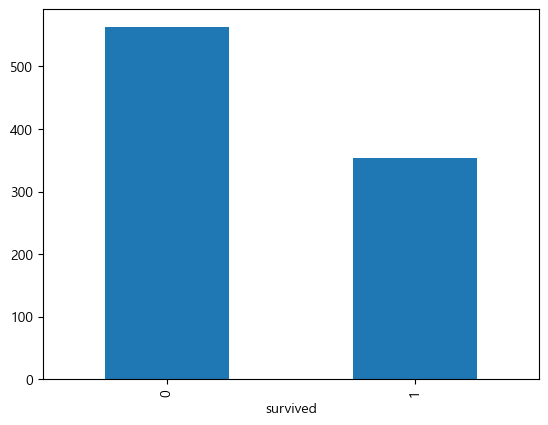

In [27]:
# bar 
df_train['survived'].value_counts().plot.bar()

In [ ]:
df_train['pclass']

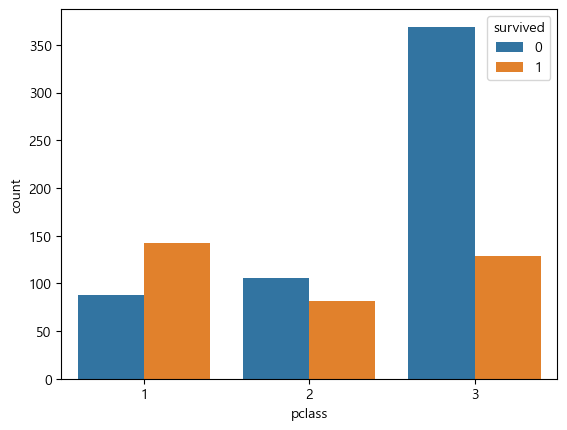

In [32]:
# 피쳐간 관령성 부분을 확인
# 생존간 등급의 관계
# pclass : Passeger class, 승객등급
df_train['pclass'].value_counts()
# sns.countplot 승객등급별 생존여부 2가지 컬럼을 가지고 그래프 비교
ax = sns.countplot(x='pclass',hue='survived', data=df_train)
